In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GSK
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


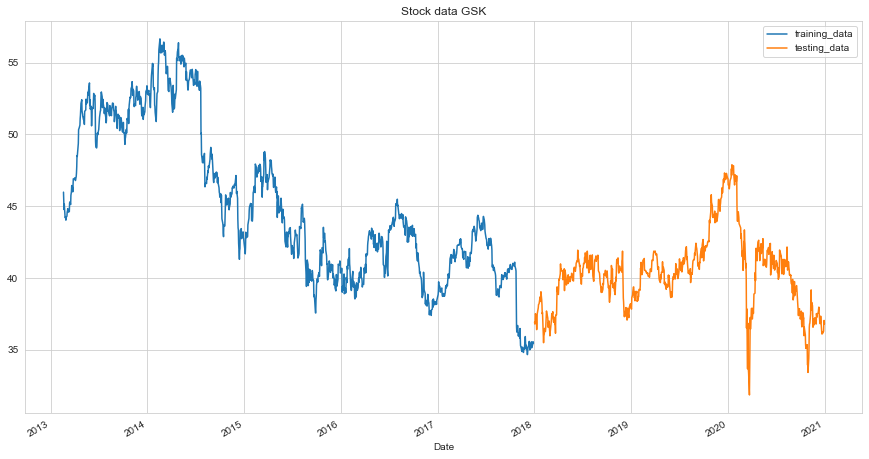

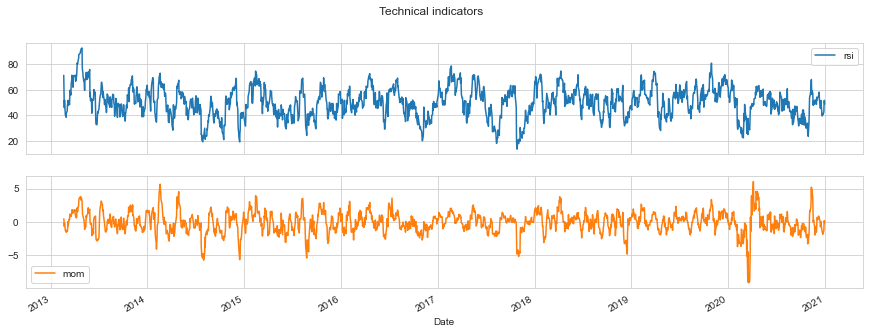

In [2]:
stock_name = 'gsk'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 971.83, duration: 0:00:00.291073
episode: 2/2000, episode end value: 985.33, duration: 0:00:00.346075
episode: 3/2000, episode end value: 937.50, duration: 0:00:00.278066
episode: 4/2000, episode end value: 970.90, duration: 0:00:00.360704
episode: 5/2000, episode end value: 983.05, duration: 0:00:00.301078
episode: 6/2000, episode end value: 978.50, duration: 0:00:00.341074
episode: 7/2000, episode end value: 985.21, duration: 0:00:00.390104
episode: 8/2000, episode end value: 978.54, duration: 0:00:00.269044
episode: 9/2000, episode end value: 980.42, duration: 0:00:00.292717
episode: 10/2000, episode end value: 974.98, duration: 0:00:00.290065
episode: 11/2000, episode end value: 996.12, duration: 0:00:00.266060
episode: 12/2000, episode end value: 965.65, duration: 0:00:00.264061
episode: 13/2000, episode end value: 978.33, duration: 0:00:00.273060
episode: 14/2000, episode end value: 984.21, duration: 0:00:00.318075
episode: 15/2000, episode end

episode: 118/2000, episode end value: 987.93, duration: 0:00:00.409099
episode: 119/2000, episode end value: 992.19, duration: 0:00:00.374079
episode: 120/2000, episode end value: 988.04, duration: 0:00:00.402093
episode: 121/2000, episode end value: 976.73, duration: 0:00:00.373082
episode: 122/2000, episode end value: 984.72, duration: 0:00:00.420096
episode: 123/2000, episode end value: 993.14, duration: 0:00:00.486109
episode: 124/2000, episode end value: 984.44, duration: 0:00:00.393093
episode: 125/2000, episode end value: 985.71, duration: 0:00:00.398087
episode: 126/2000, episode end value: 991.35, duration: 0:00:00.375084
episode: 127/2000, episode end value: 989.49, duration: 0:00:00.517124
episode: 128/2000, episode end value: 985.06, duration: 0:00:00.471102
episode: 129/2000, episode end value: 992.28, duration: 0:00:00.478103
episode: 130/2000, episode end value: 992.54, duration: 0:00:00.493112
episode: 131/2000, episode end value: 985.83, duration: 0:00:00.537120
episod

episode: 234/2000, episode end value: 984.87, duration: 0:00:00.518121
episode: 235/2000, episode end value: 962.94, duration: 0:00:00.378078
episode: 236/2000, episode end value: 984.95, duration: 0:00:00.457105
episode: 237/2000, episode end value: 961.81, duration: 0:00:00.430097
episode: 238/2000, episode end value: 976.70, duration: 0:00:00.421096
episode: 239/2000, episode end value: 976.35, duration: 0:00:00.525118
episode: 240/2000, episode end value: 978.18, duration: 0:00:00.458103
episode: 241/2000, episode end value: 980.42, duration: 0:00:00.494114
episode: 242/2000, episode end value: 980.77, duration: 0:00:00.515120
episode: 243/2000, episode end value: 989.65, duration: 0:00:00.446101
episode: 244/2000, episode end value: 979.77, duration: 0:00:00.380088
episode: 245/2000, episode end value: 969.62, duration: 0:00:00.374087
episode: 246/2000, episode end value: 981.62, duration: 0:00:00.433130
episode: 247/2000, episode end value: 973.88, duration: 0:00:00.468727
episod

episode: 350/2000, episode end value: 985.22, duration: 0:00:00.549120
episode: 351/2000, episode end value: 988.00, duration: 0:00:00.438098
episode: 352/2000, episode end value: 1021.10, duration: 0:00:00.364080
episode: 353/2000, episode end value: 990.16, duration: 0:00:00.431101
episode: 354/2000, episode end value: 993.03, duration: 0:00:00.474109
episode: 355/2000, episode end value: 981.09, duration: 0:00:00.427096
episode: 356/2000, episode end value: 998.16, duration: 0:00:00.336077
episode: 357/2000, episode end value: 1007.25, duration: 0:00:00.342081
episode: 358/2000, episode end value: 994.03, duration: 0:00:00.403871
episode: 359/2000, episode end value: 992.07, duration: 0:00:00.443100
episode: 360/2000, episode end value: 1037.15, duration: 0:00:00.409469
episode: 361/2000, episode end value: 990.21, duration: 0:00:00.439669
episode: 362/2000, episode end value: 996.55, duration: 0:00:00.427101
episode: 363/2000, episode end value: 985.04, duration: 0:00:00.503112
epi

episode: 466/2000, episode end value: 976.50, duration: 0:00:00.343073
episode: 467/2000, episode end value: 989.42, duration: 0:00:00.405092
episode: 468/2000, episode end value: 972.18, duration: 0:00:00.477109
episode: 469/2000, episode end value: 986.71, duration: 0:00:00.371084
episode: 470/2000, episode end value: 971.43, duration: 0:00:00.430103
episode: 471/2000, episode end value: 969.89, duration: 0:00:00.452105
episode: 472/2000, episode end value: 978.28, duration: 0:00:00.481102
episode: 473/2000, episode end value: 971.06, duration: 0:00:00.504668
episode: 474/2000, episode end value: 977.50, duration: 0:00:00.416095
episode: 475/2000, episode end value: 990.67, duration: 0:00:00.460104
episode: 476/2000, episode end value: 969.90, duration: 0:00:00.496104
episode: 477/2000, episode end value: 987.03, duration: 0:00:00.454767
episode: 478/2000, episode end value: 975.22, duration: 0:00:00.483108
episode: 479/2000, episode end value: 974.20, duration: 0:00:00.463105
episod

episode: 582/2000, episode end value: 962.62, duration: 0:00:00.436100
episode: 583/2000, episode end value: 966.33, duration: 0:00:00.404088
episode: 584/2000, episode end value: 968.08, duration: 0:00:00.438760
episode: 585/2000, episode end value: 973.54, duration: 0:00:00.428066
episode: 586/2000, episode end value: 1007.84, duration: 0:00:00.430200
episode: 587/2000, episode end value: 992.98, duration: 0:00:00.411607
episode: 588/2000, episode end value: 971.82, duration: 0:00:00.458104
episode: 589/2000, episode end value: 979.43, duration: 0:00:00.487102
episode: 590/2000, episode end value: 970.18, duration: 0:00:00.453108
episode: 591/2000, episode end value: 968.97, duration: 0:00:00.411493
episode: 592/2000, episode end value: 973.23, duration: 0:00:00.473628
episode: 593/2000, episode end value: 977.38, duration: 0:00:00.429096
episode: 594/2000, episode end value: 974.72, duration: 0:00:00.460104
episode: 595/2000, episode end value: 961.84, duration: 0:00:00.473107
episo

episode: 698/2000, episode end value: 954.00, duration: 0:00:00.490113
episode: 699/2000, episode end value: 967.09, duration: 0:00:00.510965
episode: 700/2000, episode end value: 1019.73, duration: 0:00:00.340586
episode: 701/2000, episode end value: 963.33, duration: 0:00:00.407124
episode: 702/2000, episode end value: 1000.60, duration: 0:00:00.379138
episode: 703/2000, episode end value: 971.87, duration: 0:00:00.417850
episode: 704/2000, episode end value: 981.69, duration: 0:00:00.398087
episode: 705/2000, episode end value: 985.26, duration: 0:00:00.409097
episode: 706/2000, episode end value: 990.80, duration: 0:00:00.391091
episode: 707/2000, episode end value: 977.01, duration: 0:00:00.436097
episode: 708/2000, episode end value: 1003.44, duration: 0:00:00.384087
episode: 709/2000, episode end value: 973.89, duration: 0:00:00.463103
episode: 710/2000, episode end value: 998.11, duration: 0:00:00.382086
episode: 711/2000, episode end value: 988.42, duration: 0:00:00.440100
epi

episode: 814/2000, episode end value: 971.05, duration: 0:00:00.483107
episode: 815/2000, episode end value: 976.73, duration: 0:00:00.428098
episode: 816/2000, episode end value: 969.72, duration: 0:00:00.404083
episode: 817/2000, episode end value: 981.28, duration: 0:00:00.422692
episode: 818/2000, episode end value: 988.24, duration: 0:00:00.429133
episode: 819/2000, episode end value: 963.85, duration: 0:00:00.406999
episode: 820/2000, episode end value: 994.54, duration: 0:00:00.432953
episode: 821/2000, episode end value: 981.58, duration: 0:00:00.367085
episode: 822/2000, episode end value: 969.62, duration: 0:00:00.403088
episode: 823/2000, episode end value: 1001.32, duration: 0:00:00.386088
episode: 824/2000, episode end value: 974.35, duration: 0:00:00.415599
episode: 825/2000, episode end value: 993.76, duration: 0:00:00.402989
episode: 826/2000, episode end value: 970.18, duration: 0:00:00.421016
episode: 827/2000, episode end value: 995.40, duration: 0:00:00.317070
episo

episode: 930/2000, episode end value: 973.76, duration: 0:00:00.497974
episode: 931/2000, episode end value: 970.67, duration: 0:00:00.495282
episode: 932/2000, episode end value: 991.23, duration: 0:00:00.467911
episode: 933/2000, episode end value: 967.85, duration: 0:00:00.530120
episode: 934/2000, episode end value: 979.88, duration: 0:00:00.449100
episode: 935/2000, episode end value: 999.51, duration: 0:00:00.459104
episode: 936/2000, episode end value: 972.92, duration: 0:00:00.535118
episode: 937/2000, episode end value: 962.22, duration: 0:00:00.505115
episode: 938/2000, episode end value: 1014.75, duration: 0:00:00.315074
episode: 939/2000, episode end value: 977.61, duration: 0:00:00.425097
episode: 940/2000, episode end value: 977.54, duration: 0:00:00.475105
episode: 941/2000, episode end value: 988.34, duration: 0:00:00.423094
episode: 942/2000, episode end value: 983.42, duration: 0:00:00.461106
episode: 943/2000, episode end value: 970.01, duration: 0:00:00.471108
episo

episode: 1045/2000, episode end value: 990.08, duration: 0:00:00.380085
episode: 1046/2000, episode end value: 975.76, duration: 0:00:00.433099
episode: 1047/2000, episode end value: 961.43, duration: 0:00:00.397094
episode: 1048/2000, episode end value: 985.00, duration: 0:00:00.393084
episode: 1049/2000, episode end value: 973.01, duration: 0:00:00.472100
episode: 1050/2000, episode end value: 966.45, duration: 0:00:00.476108
episode: 1051/2000, episode end value: 967.50, duration: 0:00:00.473107
episode: 1052/2000, episode end value: 993.92, duration: 0:00:00.419099
episode: 1053/2000, episode end value: 974.85, duration: 0:00:00.441097
episode: 1054/2000, episode end value: 981.05, duration: 0:00:00.467105
episode: 1055/2000, episode end value: 983.55, duration: 0:00:00.429099
episode: 1056/2000, episode end value: 1006.44, duration: 0:00:00.351078
episode: 1057/2000, episode end value: 971.85, duration: 0:00:00.499112
episode: 1058/2000, episode end value: 1003.90, duration: 0:00:

episode: 1159/2000, episode end value: 970.07, duration: 0:00:00.423095
episode: 1160/2000, episode end value: 976.13, duration: 0:00:00.400090
episode: 1161/2000, episode end value: 966.08, duration: 0:00:00.438099
episode: 1162/2000, episode end value: 984.05, duration: 0:00:00.403092
episode: 1163/2000, episode end value: 944.85, duration: 0:00:00.404092
episode: 1164/2000, episode end value: 962.48, duration: 0:00:00.394091
episode: 1165/2000, episode end value: 981.36, duration: 0:00:00.407091
episode: 1166/2000, episode end value: 997.02, duration: 0:00:00.356082
episode: 1167/2000, episode end value: 961.97, duration: 0:00:00.445101
episode: 1168/2000, episode end value: 988.70, duration: 0:00:00.413091
episode: 1169/2000, episode end value: 975.49, duration: 0:00:00.399091
episode: 1170/2000, episode end value: 972.55, duration: 0:00:00.467104
episode: 1171/2000, episode end value: 971.11, duration: 0:00:00.469105
episode: 1172/2000, episode end value: 995.23, duration: 0:00:00

episode: 1273/2000, episode end value: 955.71, duration: 0:00:00.310075
episode: 1274/2000, episode end value: 969.18, duration: 0:00:00.351072
episode: 1275/2000, episode end value: 945.09, duration: 0:00:00.331078
episode: 1276/2000, episode end value: 980.73, duration: 0:00:00.302066
episode: 1277/2000, episode end value: 958.99, duration: 0:00:00.272058
episode: 1278/2000, episode end value: 940.24, duration: 0:00:00.363081
episode: 1279/2000, episode end value: 962.99, duration: 0:00:00.280064
episode: 1280/2000, episode end value: 967.28, duration: 0:00:00.387087
episode: 1281/2000, episode end value: 949.90, duration: 0:00:00.431096
episode: 1282/2000, episode end value: 935.07, duration: 0:00:00.439103
episode: 1283/2000, episode end value: 958.26, duration: 0:00:00.307075
episode: 1284/2000, episode end value: 950.20, duration: 0:00:00.364077
episode: 1285/2000, episode end value: 945.05, duration: 0:00:00.378086
episode: 1286/2000, episode end value: 960.89, duration: 0:00:00

episode: 1387/2000, episode end value: 977.44, duration: 0:00:00.435098
episode: 1388/2000, episode end value: 987.44, duration: 0:00:00.415099
episode: 1389/2000, episode end value: 984.30, duration: 0:00:00.425094
episode: 1390/2000, episode end value: 975.61, duration: 0:00:00.448102
episode: 1391/2000, episode end value: 973.16, duration: 0:00:00.446103
episode: 1392/2000, episode end value: 970.05, duration: 0:00:00.417098
episode: 1393/2000, episode end value: 959.03, duration: 0:00:00.356075
episode: 1394/2000, episode end value: 960.08, duration: 0:00:00.402094
episode: 1395/2000, episode end value: 972.95, duration: 0:00:00.436095
episode: 1396/2000, episode end value: 962.58, duration: 0:00:00.379066
episode: 1397/2000, episode end value: 970.10, duration: 0:00:00.384085
episode: 1398/2000, episode end value: 967.48, duration: 0:00:00.423097
episode: 1399/2000, episode end value: 976.59, duration: 0:00:00.363080
episode: 1400/2000, episode end value: 963.38, duration: 0:00:00

episode: 1501/2000, episode end value: 974.36, duration: 0:00:00.396756
episode: 1502/2000, episode end value: 969.20, duration: 0:00:00.403532
episode: 1503/2000, episode end value: 979.36, duration: 0:00:00.405089
episode: 1504/2000, episode end value: 960.80, duration: 0:00:00.426095
episode: 1505/2000, episode end value: 972.76, duration: 0:00:00.339078
episode: 1506/2000, episode end value: 977.58, duration: 0:00:00.452105
episode: 1507/2000, episode end value: 971.85, duration: 0:00:00.416089
episode: 1508/2000, episode end value: 961.07, duration: 0:00:00.390089
episode: 1509/2000, episode end value: 975.23, duration: 0:00:00.510118
episode: 1510/2000, episode end value: 970.48, duration: 0:00:00.392090
episode: 1511/2000, episode end value: 979.35, duration: 0:00:00.507111
episode: 1512/2000, episode end value: 975.93, duration: 0:00:00.371079
episode: 1513/2000, episode end value: 960.34, duration: 0:00:00.398092
episode: 1514/2000, episode end value: 977.38, duration: 0:00:00

episode: 1615/2000, episode end value: 972.92, duration: 0:00:00.382084
episode: 1616/2000, episode end value: 980.71, duration: 0:00:00.355080
episode: 1617/2000, episode end value: 970.02, duration: 0:00:00.325074
episode: 1618/2000, episode end value: 974.56, duration: 0:00:00.365835
episode: 1619/2000, episode end value: 963.11, duration: 0:00:00.318005
episode: 1620/2000, episode end value: 982.63, duration: 0:00:00.398778
episode: 1621/2000, episode end value: 976.70, duration: 0:00:00.326073
episode: 1622/2000, episode end value: 965.58, duration: 0:00:00.360083
episode: 1623/2000, episode end value: 972.50, duration: 0:00:00.425103
episode: 1624/2000, episode end value: 965.26, duration: 0:00:00.384093
episode: 1625/2000, episode end value: 974.23, duration: 0:00:00.379082
episode: 1626/2000, episode end value: 977.72, duration: 0:00:00.471876
episode: 1627/2000, episode end value: 971.96, duration: 0:00:00.428010
episode: 1628/2000, episode end value: 968.14, duration: 0:00:00

episode: 1729/2000, episode end value: 969.76, duration: 0:00:00.336075
episode: 1730/2000, episode end value: 977.56, duration: 0:00:00.309072
episode: 1731/2000, episode end value: 969.00, duration: 0:00:00.321076
episode: 1732/2000, episode end value: 958.86, duration: 0:00:00.337073
episode: 1733/2000, episode end value: 966.48, duration: 0:00:00.323074
episode: 1734/2000, episode end value: 963.42, duration: 0:00:00.327071
episode: 1735/2000, episode end value: 961.92, duration: 0:00:00.339076
episode: 1736/2000, episode end value: 961.55, duration: 0:00:00.359084
episode: 1737/2000, episode end value: 970.21, duration: 0:00:00.353080
episode: 1738/2000, episode end value: 964.13, duration: 0:00:00.360087
episode: 1739/2000, episode end value: 966.21, duration: 0:00:00.331072
episode: 1740/2000, episode end value: 959.58, duration: 0:00:00.357077
episode: 1741/2000, episode end value: 958.31, duration: 0:00:00.364084
episode: 1742/2000, episode end value: 974.37, duration: 0:00:00

episode: 1843/2000, episode end value: 963.35, duration: 0:00:00.335078
episode: 1844/2000, episode end value: 965.20, duration: 0:00:00.404085
episode: 1845/2000, episode end value: 970.47, duration: 0:00:00.391089
episode: 1846/2000, episode end value: 970.85, duration: 0:00:00.342077
episode: 1847/2000, episode end value: 973.76, duration: 0:00:00.331075
episode: 1848/2000, episode end value: 975.86, duration: 0:00:00.347080
episode: 1849/2000, episode end value: 973.70, duration: 0:00:00.419094
episode: 1850/2000, episode end value: 965.33, duration: 0:00:00.435101
episode: 1851/2000, episode end value: 985.27, duration: 0:00:00.423096
episode: 1852/2000, episode end value: 990.08, duration: 0:00:00.385090
episode: 1853/2000, episode end value: 970.75, duration: 0:00:00.409090
episode: 1854/2000, episode end value: 984.16, duration: 0:00:00.378089
episode: 1855/2000, episode end value: 973.01, duration: 0:00:00.305069
episode: 1856/2000, episode end value: 963.63, duration: 0:00:00

episode: 1957/2000, episode end value: 956.70, duration: 0:00:00.302067
episode: 1958/2000, episode end value: 980.37, duration: 0:00:00.338084
episode: 1959/2000, episode end value: 965.51, duration: 0:00:00.307069
episode: 1960/2000, episode end value: 965.28, duration: 0:00:00.292612
episode: 1961/2000, episode end value: 980.20, duration: 0:00:00.322554
episode: 1962/2000, episode end value: 974.74, duration: 0:00:00.369196
episode: 1963/2000, episode end value: 972.20, duration: 0:00:00.308559
episode: 1964/2000, episode end value: 981.09, duration: 0:00:00.284064
episode: 1965/2000, episode end value: 986.53, duration: 0:00:00.321073
episode: 1966/2000, episode end value: 982.83, duration: 0:00:00.324074
episode: 1967/2000, episode end value: 975.80, duration: 0:00:00.372089
episode: 1968/2000, episode end value: 965.49, duration: 0:00:00.322065
episode: 1969/2000, episode end value: 986.21, duration: 0:00:00.325073
episode: 1970/2000, episode end value: 961.06, duration: 0:00:00

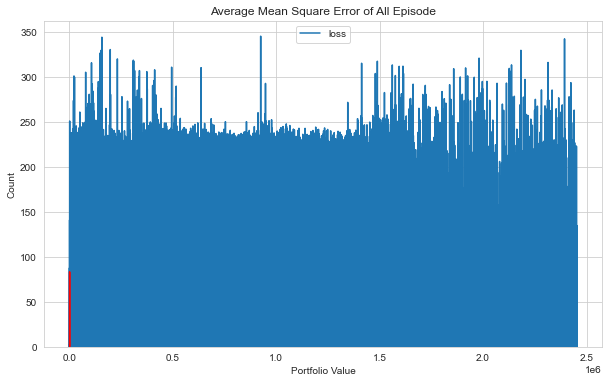

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

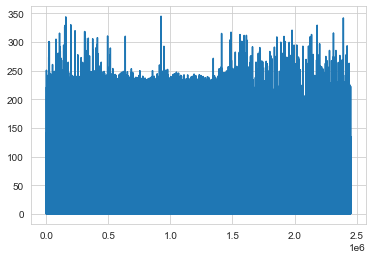

In [5]:
plt.plot(agent.model.losses)

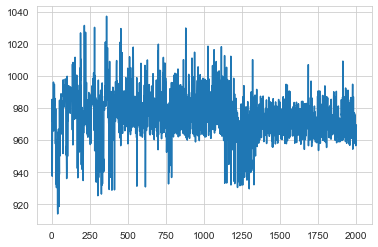

In [6]:
plt.plot(portfolio_value)

episode end value: 973.77, duration: 0:00:00.069012
Sell: 22 times, Buy: 21 times


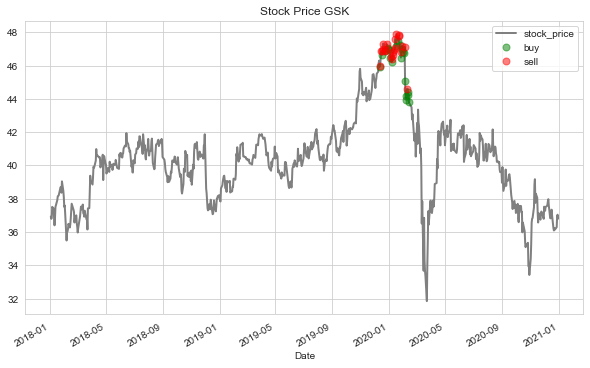

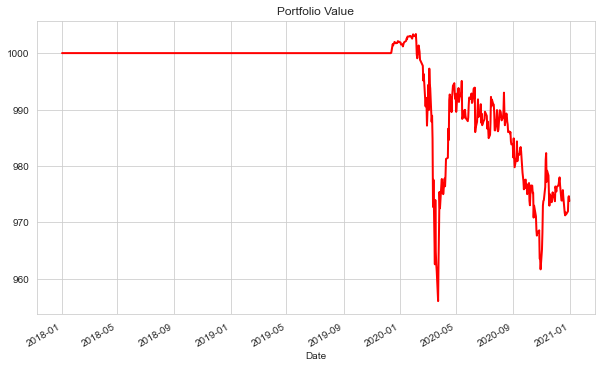

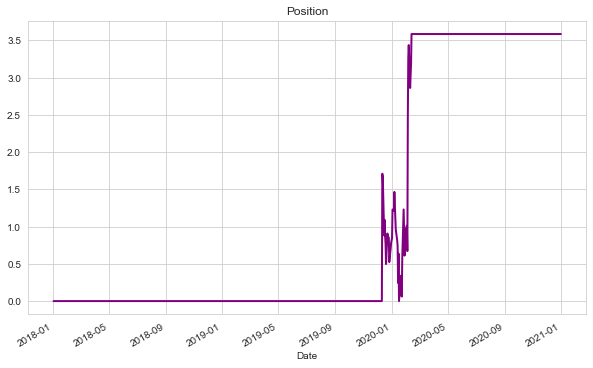

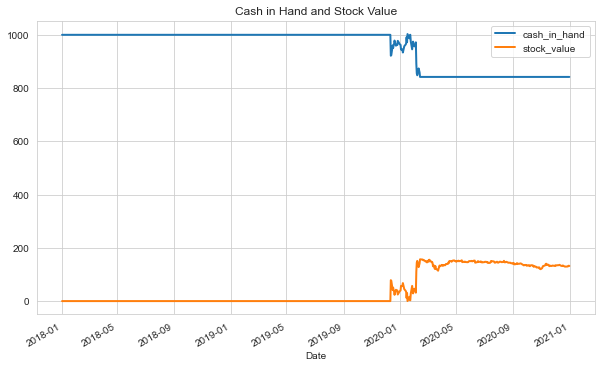

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GSK
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -0.88 %
Volatility: 0.0254
shape ratio: -0.7800
Maximun drawdown: -4.72 %
Calmar ratio: -0.1869
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -0.12 %
Volatility (benchmark): 0.2321
shape ratio: -0.0524
Maximun drawdown: -33.49 %
Calmar ratio (benchmark): -0.0035


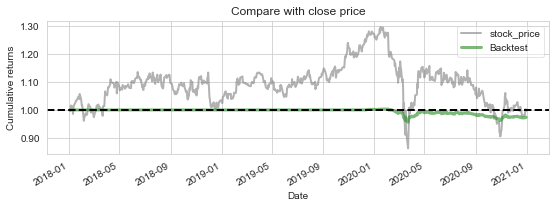

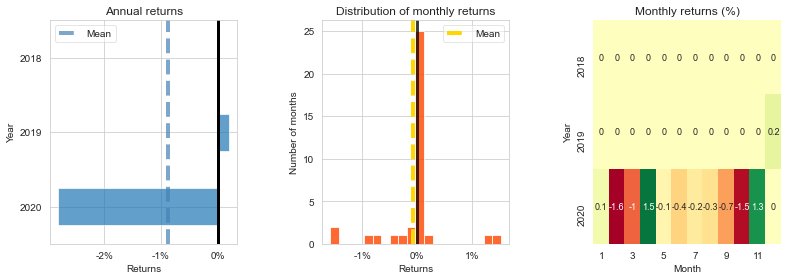

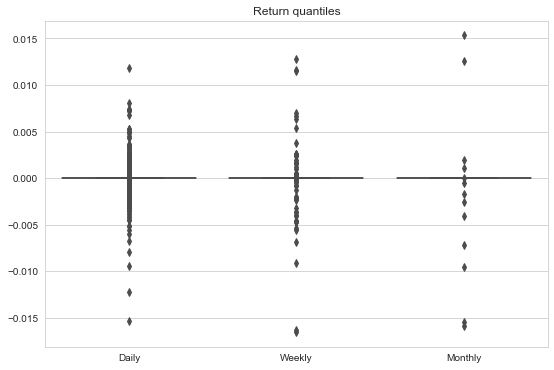

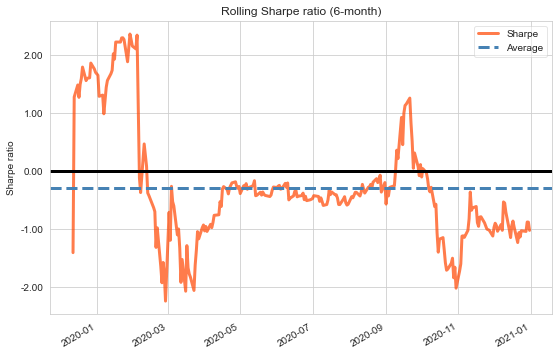

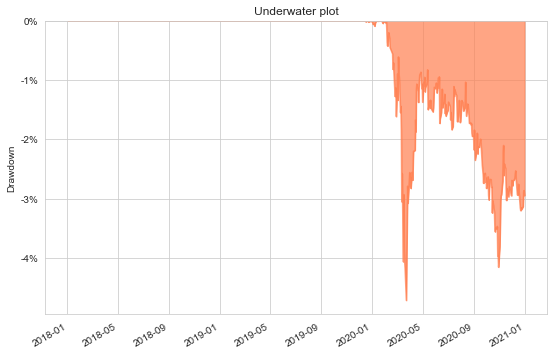

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')